In [1]:
import os
import sys

from dotenv import load_dotenv

load_dotenv(override=True)

True

In [2]:
import base64
import mimetypes

In [3]:
def create_http_client():
    from llama_stack_client import LlamaStackClient

    return LlamaStackClient(base_url=f"http://localhost:{os.environ['LLAMA_STACK_PORT']}")

In [7]:
client = create_http_client()

In [9]:
response = client.inference.chat_completion(
    model_id="sambanova/Meta-Llama-3.1-8B-Instruct",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Write a haiku about coding"},
    ],
)
print(response)
print(response.completion_message.content)

ChatCompletionResponse(completion_message=CompletionMessage(content='Lines of code unfold\nLogic flows like morning dew\nBeauty in the byte', role='assistant', stop_reason='end_of_turn', tool_calls=[]), logprobs=None, metrics=[Metric(metric='prompt_tokens', value=27.0, unit=None), Metric(metric='completion_tokens', value=25.0, unit=None), Metric(metric='total_tokens', value=52.0, unit=None)])
Lines of code unfold
Logic flows like morning dew
Beauty in the byte


''
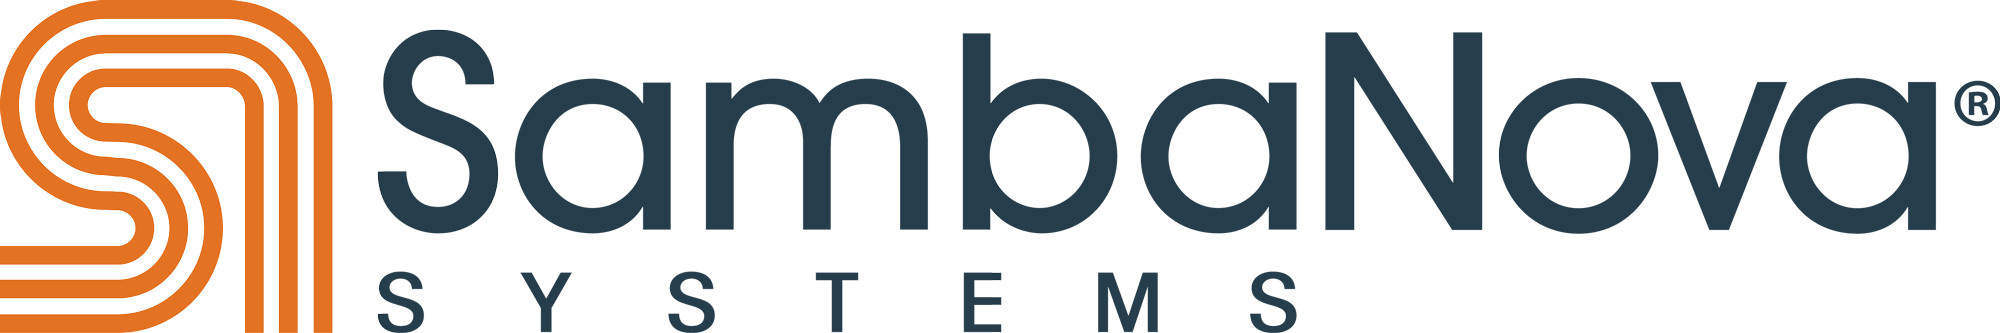

In [10]:
def data_url_from_image(file_path):
    mime_type, _ = mimetypes.guess_type(file_path)
    if mime_type is None:
        raise ValueError("Could not determine MIME type of the file")

    with open(file_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode("utf-8")

    data_url = f"data:{mime_type};base64,{encoded_string}"
    return data_url


data_url_from_image("../../images/SambaNova-dark-logo-1.png")

In [11]:
def list_models():
    models = []
    for model in client.models.list():
        models.append(model.identifier)
    return models


list_models()

['Llama-3.2-11B-Vision-Instruct',
 'Llama-3.2-90B-Vision-Instruct',
 'Meta-Llama-3.1-405B-Instruct',
 'Meta-Llama-3.1-70B-Instruct',
 'Meta-Llama-3.1-8B-Instruct',
 'Meta-Llama-3.2-1B-Instruct',
 'Meta-Llama-3.2-3B-Instruct',
 'Meta-Llama-3.3-70B-Instruct',
 'Meta-Llama-Guard-3-8B',
 'all-MiniLM-L6-v2',
 'meta-llama/Llama-3.1-405B-Instruct-FP8',
 'meta-llama/Llama-3.1-70B-Instruct',
 'meta-llama/Llama-3.1-8B-Instruct',
 'meta-llama/Llama-3.2-11B-Vision-Instruct',
 'meta-llama/Llama-3.2-1B-Instruct',
 'meta-llama/Llama-3.2-3B-Instruct',
 'meta-llama/Llama-3.2-90B-Vision-Instruct',
 'meta-llama/Llama-3.3-70B-Instruct',
 'meta-llama/Llama-Guard-3-8B',
 'sambanova/Llama-3.2-11B-Vision-Instruct',
 'sambanova/Llama-3.2-90B-Vision-Instruct',
 'sambanova/Meta-Llama-3.1-405B-Instruct',
 'sambanova/Meta-Llama-3.1-70B-Instruct',
 'sambanova/Meta-Llama-3.1-8B-Instruct',
 'sambanova/Meta-Llama-3.2-1B-Instruct',
 'sambanova/Meta-Llama-3.2-3B-Instruct',
 'sambanova/Meta-Llama-3.3-70B-Instruct',
 'sam

In [13]:
def test_inference_llm_text_only(stream: bool):
    model_ids = list_models()
    print("========== Inference: Text Only ==========")
    assert len(model_ids) > 0
    for model_id in model_ids:
        if "guard" not in model_id.lower() and "sambanova" in model_id:
            print(f">>>>> Sending request to {model_id}")
            iterator = client.inference.chat_completion(
                model_id=model_id,
                messages=[
                    {"role": "system", "content": "You are a helpful assistant."},
                    {"role": "user", "content": "Write a haiku on llamas"},
                ],
                stream=stream,
            )
            if stream:
                print("<<<<< Streaming Response")
                text = ""
                for chunk in iterator:
                    print(f"{chunk.event.delta.text}", end="", flush=True)
                    text += chunk.event.delta.text
                assert text != ""
                print()
            else:
                print("<<<<< Non-streaming Response")
                print(f"Type: {type(iterator.completion_message.content)}, Value:{iterator.completion_message.content}")
                assert iterator.completion_message.content != ""

In [14]:
test_inference_llm_text_only(stream=False)

========== Inference: Text Only ==========
>>>>> Sending request to sambanova/Llama-3.2-11B-Vision-Instruct
<<<<< Non-streaming Response
Type: <class 'str'>, Value:Fuzzy llama eyes
Softly gaze with gentle soul
Mountain's gentle friend
>>>>> Sending request to sambanova/Llama-3.2-90B-Vision-Instruct
<<<<< Non-streaming Response
Type: <class 'str'>, Value:Fuzzy gentle eyes
Llama's soft and quiet pace
Misty mountain friend
>>>>> Sending request to sambanova/Meta-Llama-3.1-405B-Instruct
<<<<< Non-streaming Response
Type: <class 'str'>, Value:Softly gentle eyes
Llama's gentle, fuzzy form
Misty Andes home
>>>>> Sending request to sambanova/Meta-Llama-3.1-70B-Instruct
<<<<< Non-streaming Response
Type: <class 'str'>, Value:Fuzzy gentle eyes
Llama's soft and quiet pace
Misty mountain friend
>>>>> Sending request to sambanova/Meta-Llama-3.1-8B-Instruct
<<<<< Non-streaming Response
Type: <class 'str'>, Value:Fuzzy llama eyes
Softly gaze with gentle soul
Mountain's gentle friend
>>>>> Sending req

In [15]:
test_inference_llm_text_only(stream=True)

========== Inference: Text Only ==========
>>>>> Sending request to sambanova/Llama-3.2-11B-Vision-Instruct
<<<<< Streaming Response
Fuzzy llama eyes
Softly gaze with gentle soul
Mountain's gentle friend
>>>>> Sending request to sambanova/Llama-3.2-90B-Vision-Instruct
<<<<< Streaming Response
Fuzzy gentle eyes
Llama's soft and quiet pace
Misty mountain friend
>>>>> Sending request to sambanova/Meta-Llama-3.1-405B-Instruct
<<<<< Streaming Response
Softly gentle eyes
Llama's gentle, fuzzy form
Misty Andes home
>>>>> Sending request to sambanova/Meta-Llama-3.1-70B-Instruct
<<<<< Streaming Response
Fuzzy gentle eyes
Llama's soft and quiet pace
Misty mountain friend
>>>>> Sending request to sambanova/Meta-Llama-3.1-8B-Instruct
<<<<< Streaming Response
Fuzzy llama eyes
Softly gaze with gentle soul
Mountain's gentle friend
>>>>> Sending request to sambanova/Meta-Llama-3.2-1B-Instruct
<<<<< Streaming Response
Softly padded feet
Gentle eyes in the Andes
Llama's gentle soul
>>>>> Sending request

In [16]:
def test_inference_llm_text_tool(stream: bool):
    model_ids = [
        # "sambanova/Meta-Llama-3.1-8B-Instruct",
        "sambanova/Meta-Llama-3.1-70B-Instruct",
        "sambanova/Meta-Llama-3.1-405B-Instruct",
        "sambanova/Meta-Llama-3.3-70B-Instruct",
    ]

    print("========== Inference: Text and Tool ==========")

    assert len(model_ids) > 0
    for model_id in model_ids:
        print(f">>>>> Sending request to {model_id}")
        iterator = client.inference.chat_completion(
            model_id=model_id,
            messages=[
                {
                    "role": "system",
                    "content": "You are an assistant that can solve quadratic equations given coefficients a, b, and c.",
                },
                {
                    "role": "user",
                    "content": "Find all the roots of a quadratic equation given coefficients a = 3, b = -11, and c = -4.",
                },
            ],
            tools=[
                {
                    "tool_name": "solve_quadratic",
                    "description": "Solve a quadratic equation given coefficients a, b, and c.",
                    "parameters": {
                        "a": {
                            "param_type": "integer",
                            "description": "Coefficient of the squared term.",
                            "required": True,
                        },
                        "b": {
                            "param_type": "integer",
                            "description": "Coefficient of the linear term.",
                            "required": True,
                        },
                        "c": {"param_type": "integer", "description": "Constant term.", "required": True},
                        "root_type": {
                            "param_type": "string",
                            "description": "Type of roots: 'real' or 'all'.",
                            "required": True,
                        },
                    },
                }
            ],
            stream=stream,
        )

        if stream:
            print("<<<<< Streaming Response")
            for chunk in iterator:
                delta = chunk.event.delta
                if delta.type == "tool_call":
                    print(f"{delta}")
                else:
                    print(delta.text)

        else:
            print("<<<<< Non-streaming Response")
            tool_calls = iterator.completion_message.tool_calls
            print(tool_calls)

        print()

In [17]:
test_inference_llm_text_tool(stream=False)

========== Inference: Text and Tool ==========
>>>>> Sending request to sambanova/Meta-Llama-3.1-70B-Instruct
<<<<< Non-streaming Response
[ToolCall(arguments={'a': 3.0, 'b': -11.0, 'c': -4.0, 'root_type': 'all'}, call_id='call_be8826350ec044c4aa', tool_name='solve_quadratic')]

>>>>> Sending request to sambanova/Meta-Llama-3.1-405B-Instruct
<<<<< Non-streaming Response
[ToolCall(arguments={'a': 3.0, 'b': -11.0, 'c': -4.0, 'root_type': 'all'}, call_id='call_30f6d4dcaf9f4c8e8b', tool_name='solve_quadratic')]

>>>>> Sending request to sambanova/Meta-Llama-3.3-70B-Instruct
<<<<< Non-streaming Response
[ToolCall(arguments={'a': 3.0, 'b': -11.0, 'c': -4.0, 'root_type': 'all'}, call_id='call_689758dcdb2647be88', tool_name='solve_quadratic')]



In [18]:
test_inference_llm_text_tool(stream=True)

========== Inference: Text and Tool ==========
>>>>> Sending request to sambanova/Meta-Llama-3.1-70B-Instruct
<<<<< Streaming Response

ToolCallDelta(parse_status='in_progress', tool_call='{"a":3,"b":-11,"c":-4,"root_type":"all"}', type='tool_call')

ToolCallDelta(parse_status='in_progress', tool_call=')', type='tool_call')
ToolCallDelta(parse_status='succeeded', tool_call=ToolCall(arguments={'a': 3.0, 'b': -11.0, 'c': -4.0, 'root_type': 'all'}, call_id='call_5e56e14949404bc99c', tool_name='solve_quadratic'), type='tool_call')


>>>>> Sending request to sambanova/Meta-Llama-3.1-405B-Instruct
<<<<< Streaming Response

ToolCallDelta(parse_status='in_progress', tool_call='{"a":3,"b":-11,"c":-4,"root_type":"all"}', type='tool_call')

ToolCallDelta(parse_status='in_progress', tool_call=')', type='tool_call')
ToolCallDelta(parse_status='succeeded', tool_call=ToolCall(arguments={'a': 3.0, 'b': -11.0, 'c': -4.0, 'root_type': 'all'}, call_id='call_78b75aa6ce4a47ce8e', tool_name='solve_quadratic

In [19]:
def test_inference_llm_text_image(stream: bool):
    model_ids = ["sambanova/Llama-3.2-11B-Vision-Instruct", "sambanova/Llama-3.2-90B-Vision-Instruct"]
    data_url = data_url_from_image("../ai-starter-kit-snova/images/SambaNova-dark-logo-1.png")

    print("========== Inference: Text and Image ==========")

    assert len(model_ids) > 0
    for model_id in model_ids:
        print(f">>>>> Sending request to {model_id}")
        iterator = client.inference.chat_completion(
            model_id=model_id,
            messages=[
                {"role": "user", "content": {"type": "image", "image": {"url": {"uri": data_url}}}},
                {
                    "role": "user",
                    "content": "How many different colors are in this image?",
                },
            ],
            stream=stream,
        )

        if stream:
            print("<<<<< Streaming Response")
            text = ""
            for chunk in iterator:
                if chunk.event is not None:
                    print(f"{chunk.event.delta.text}", end="", flush=True)
                    text += chunk.event.delta.text

            assert text != ""
            print()
        else:
            print("<<<<< Non-streaming Response")
            print(f"Type: {type(iterator.completion_message.content)}, Value:{iterator.completion_message.content}")
            assert iterator.completion_message.content != ""

        print()

In [20]:
test_inference_llm_text_image(stream=True)

FileNotFoundError: [Errno 2] No such file or directory: '../ai-starter-kit-snova/images/SambaNova-dark-logo-1.png'

In [23]:
def test_inference_llm_image_only(stream: bool):
    model_ids = ["sambanova/Llama-3.2-11B-Vision-Instruct", "sambanova/Llama-3.2-11B-Vision-Instruct"]

    data_url = data_url_from_image("../../images/SambaNova-dark-logo-1.png")

    print("========== Inference: Text and Image ==========")

    assert len(model_ids) > 0
    for model_id in model_ids:
        print(f">>>>> Sending request to {model_id}")
        iterator = client.inference.chat_completion(
            model_id=model_id,
            messages=[{"role": "user", "content": {"type": "image", "image": {"url": {"uri": data_url}}}}],
            stream=stream,
        )

        if stream:
            print("<<<<< Streaming Response")
            text = ""
            for chunk in iterator:
                if chunk.event is not None:
                    print(f"{chunk.event.delta.text}", end="", flush=True)
                    text += chunk.event.delta.text

            assert text != ""
            print()
        else:
            print("<<<<< Non-streaming Response")
            print(f"Type: {type(iterator.completion_message.content)}, Value:{iterator.completion_message.content}")
            assert iterator.completion_message.content != ""

        print()

In [24]:
test_inference_llm_image_only(stream=False)

========== Inference: Text and Image ==========
>>>>> Sending request to sambanova/Llama-3.2-11B-Vision-Instruct
<<<<< Non-streaming Response
Type: <class 'str'>, Value:The image displays the logo for SambaNova Systems, a company that specializes in artificial intelligence (AI) and machine learning (ML) solutions. The logo is prominently displayed in the center of the image.

* The logo features the company name "SambaNova Systems" in large, bold letters.
	+ The text is in a modern, sans-serif font and is colored in a dark gray or blue-gray hue.
	+ The word "SambaNova" is written in a larger size than the word "Systems".
* To the left of the company name is a stylized letter "S" made up of curved lines.
	+ The letter "S" is orange in color and has a smooth, flowing design.
	+ The curved lines of the letter "S" are reminiscent of a wave or a spiral, suggesting movement and energy.
* The background of the image is a solid gray color.
	+ The gray tone is a medium-light gray, providing a n

In [25]:
test_inference_llm_image_only(stream=True)

========== Inference: Text and Image ==========
>>>>> Sending request to sambanova/Llama-3.2-11B-Vision-Instruct
<<<<< Streaming Response
The image displays the logo for SambaNova Systems, a company that specializes in artificial intelligence (AI) and machine learning (ML) solutions. The logo is prominently displayed in the center of the image.

* The logo features the company name "SambaNova Systems" in large, bold letters.
	+ The text is in a modern, sans-serif font and is colored in a dark gray or blue-gray hue.
	+ The word "SambaNova" is written in a larger size than the word "Systems".
* To the left of the company name is a stylized letter "S" made up of curved lines.
	+ The letter "S" is orange in color and has a smooth, flowing design.
	+ The curved lines of the letter "S" are reminiscent of a wave or a spiral, suggesting movement and energy.
* The background of the image is a solid gray color.
	+ The gray tone is a medium-light gray, providing a neutral and clean backdrop for t

In [26]:
def test_inference_safety_text_only(stream: bool):
    model_ids = list_models()
    print("========== Safety on Inference: Text Only ==========")
    assert len(model_ids) > 0
    for model_id in model_ids:
        if "guard" in model_id.lower() and "sambanova" in model_id.lower():
            print(f">>>>> Sending request to {model_id}")
            iterator = client.inference.chat_completion(
                model_id=model_id, messages=[{"role": "user", "content": "Write a haiku on llamas"}], stream=stream
            )

            if stream:
                print("<<<<< Streaming Response")
                text = ""
                for chunk in iterator:
                    if chunk.event is not None:
                        print(f"{chunk.event.delta.text}", end="", flush=True)
                        text += chunk.event.delta.text

                assert text != ""
                print()
            else:
                print("<<<<< Non-streaming Response")
                print(f"Type: {type(iterator.completion_message.content)}, Value:{iterator.completion_message.content}")
                assert iterator.completion_message.content != ""

            print()

In [27]:
test_inference_safety_text_only(stream=False)

========== Safety on Inference: Text Only ==========
>>>>> Sending request to sambanova/Meta-Llama-Guard-3-8B
<<<<< Non-streaming Response
Type: <class 'str'>, Value:

safe



In [28]:
test_inference_safety_text_only(stream=True)

========== Safety on Inference: Text Only ==========
>>>>> Sending request to sambanova/Meta-Llama-Guard-3-8B
<<<<< Streaming Response


safe



In [ ]:
def test_text_safety():
    model_ids = [
        # "Meta-Llama-Guard-3-8B",
        "sambanova/meta-llama/Llama-Guard-3-8B"
    ]

    print("========== Safety:Text Only ==========")

    assert len(model_ids) > 0
    for model_id in model_ids:
        print(f">>>>> Sending request to {model_id}")
        iterator = client.safety.run_shield(
            shield_id=model_id, messages=[{"role": "user", "content": "how to make a gun"}], params={}
        )

        print(" Response")
        print(iterator)

In [32]:
test_text_safety()

========== Safety:Text Only ==========
>>>>> Sending request to meta-llama/Llama-Guard-3-8B


InternalServerError: Error code: 500 - {'detail': 'Internal server error: An unexpected error occurred.'}

# Agents

In [ ]:
# RAG example
import uuid
from termcolor import cprint
from llama_stack_client.types import Document
from llama_stack_client.lib.agents.agent import Agent
from llama_stack_client.lib.agents.event_logger import EventLogger

urls = ["chat.rst", "llama3.rst", "memory_optimizations.rst", "lora_finetune.rst"]
documents = [
    Document(
        document_id=f"num-{i}",
        content=f"https://raw.githubusercontent.com/pytorch/torchtune/main/docs/source/tutorials/{url}",
        mime_type="text/plain",
        metadata={},
    )
    for i, url in enumerate(urls)
]
documents

In [ ]:
vector_providers = [provider for provider in client.providers.list() if provider.api == "vector_io"]
print(vector_providers)
provider_id = vector_providers[0].provider_id  # Use the first available vector provider


In [ ]:
# Register a vector database
vector_db_id = f"test-vector-db-{uuid.uuid4().hex}"
client.vector_dbs.register(
    vector_db_id=vector_db_id,
    provider_id=provider_id,
    embedding_model="all-MiniLM-L6-v2",
    embedding_dimension=384,
)

In [ ]:
# Insert the documents into the vector database
client.tool_runtime.rag_tool.insert(
    documents=documents,
    vector_db_id=vector_db_id,
    chunk_size_in_tokens=512,
)

In [ ]:
rag_agent = Agent(
    client,
    model="sambanova/Meta-Llama-3.3-70B-Instruct",
    # Define instructions for the agent ( aka system prompt)
    instructions="You are a helpful assistant",
    enable_session_persistence=False,
    # Define tools available to the agent
    tools=[
        {
            "name": "builtin::rag/knowledge_search",
            "args": {
                "vector_db_ids": [vector_db_id],
            },
        }
    ],
)

In [ ]:
session_id = rag_agent.create_session("test-session")

user_prompts = [
    "How to optimize memory usage in torchtune? use the knowledge_search tool to get information.",
]

# Run the agent loop by calling the `create_turn` method
for prompt in user_prompts:
    cprint(f"User> {prompt}", "green")
    response = rag_agent.create_turn(
        messages=[{"role": "user", "content": prompt}],
        session_id=session_id,
    )
    for log in EventLogger().log(response):
        log.print()

In [ ]:
# simple react agent

In [ ]:
from llama_stack_client.types.agent_create_params import AgentConfig


# Example tool definition
def get_weather(city: str) -> int:
    """
    Runs get weather tool.
    returns the temperature in celius
    :param city: city
    """
    return 26


agent = Agent(
    client,
    model="sambanova/Meta-Llama-3.1-70B-Instruct",
    instructions="You are a helpful assistant. Use the tools you have access to for providing relevant answers",
    sampling_params={
        "strategy": {"type": "top_p", "temperature": 1.0, "top_p": 0.9},
    },
    tools=[get_weather],
    # input_shields=available_shields if available_shields else [],
    # output_shields=available_shields if available_shields else [],
    enable_session_persistence=False,
)


response = agent.create_turn(
    messages=[{"role": "user", "content": "how is the weather in paris?"}],
    session_id=agent.create_session("tool_session"),
    stream=True,
)

# print(response.output_message.content)
for event in response:
    print(event)
    if event.event.payload.event_type == "turn_complete":
        print("#####")
        print(event.event.payload.turn.output_message.content)